# PDX Tumors from Ben Drapkin


In [2]:
import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import numpy as np
import dropkick as dk

# Preprocessing

## Read in Files

In [3]:
sig_matrix = pd.read_csv('../data/sig_matrix_ParTI.csv', header =0, index_col = 0)
sig_matrix = sig_matrix / np.linalg.norm(sig_matrix, axis=0)

In [4]:
indir = "../data/loom/"

samples = ['MGH1518-B3','MGH1518-3A2']
[a1,a2] = [mb.pp.read_loom(sample, indir) for sample in samples]


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
a2

AnnData object with n_obs × n_vars = 5200 × 36601
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

## Filter and concatenate

In [68]:
tfs = ['SP100', 'FOSL1', 'HES1', 'NFKBIZ', 'RELB', 'EPAS1', 'BCL3', 'REST', 'SP110', 'NFKB2', 'TEAD2', 'HMG20B', 'SIX5',
       'RARG', 'TEAD4', 'ZNF217', 'SP140L', 'SOX18', 'HOXC13', 'STAT6', 'ETV4', 'KLF2', 'MITF', 'NR0B2', 'ASCL1', 'ZBTB7C', 'ELF3',
       'RORC', 'FOXA2', 'ETS2','TOX3', 'XBP1', 'ST18', 'FOXA1', 'OVOL2', 'ZNF664', 'TBX10', 'PROX1', 'ETV6', 'CEBPD', 'TFCP2L1', 'FOXJ3',
       'ZNF407', 'ZNF511','ZNF396', 'RBPJ', 'ZSCAN31', 'HOXB5', 'ZNF3', 'TSHZ2', 'ZBTB16', 'ZNF10', 'FLI1', 'GATA4', 'NR0B1', 'NHLH1',
       'NEUROD6', 'ZNF581', 'TCF15', 'LYAR', 'ISL2', 'OLIG2', 'NEUROD1', 'INSM1', 'PAX5', 'SP6', 'MYT1', 'HES6', 'ZNF24', 'ISL1', 'ZNF397',
       'SOX11', 'ZNF253', 'SMAD4', 'RBP1', 'ONECUT2', 'ZNF711', 'DLX5', 'GRIP1', 'ZNF157', 'ZNF713', 'ZNF136', 'FOXN4', 'PATZ1', 'ZNF491',
       'ZBTB21', 'KLF12', 'ZNF501', 'ZNF785', 'CXXC1', 'ZNF324', 'ZNF764', 'ZBTB18', 'KAT8', 'ZNF334', 'POU4F1', 'ZNF250', 'ZNF132',
       'SALL2', 'DLX6', 'MBD1','SOX1', 'ZFP3', 'ZNF543', 'POU2F1', 'NONO', 'SMAD9', 'ZKSCAN2', 'TCF12', 'VEZF1', 'TOX', 'BHLHE22', 'MTA1',
       'TCF3', 'SCRT2', 'RFX7','NHLH2', 'SCRT1', 'RCOR2', 'PURG', 'TBPL1', 'TCF4', 'EBF1', 'ZNF749', 'NEUROD2', 'ZNF423', 'BACH2', 'GLI1',
       'ZFP64','NKX2-1', 'MYC', 'YAP1', 'POU2F3', 'MYCL', 'MYCN', 'ASCL2', 'AVIL', 'CHAT', 'GFI1B',
      'CHGA','EPCAM']
genes = sig_matrix.index

Dropkick is a tool to get rid of empty and low-quality droplets based on ambient reads. It should be applied to each sample separately, so we will apply first and then concantenate the data into one AnnData object.

<div class="alert alert-block alert-success">
<b>Checkpoint:</b> I am using DropKick as opposed to Scanpy filtering to see if it filters out the cells that are in G1 with low Myc. There is a worry that cells are arresting in response to being sequenced.
</div>

In [70]:
batch_categories = ['B3','3A2']
batch_key = 'timepoints'

# adata = a1.concatenate(a2, batch_key='timepoints')
# mb.pp.scanpy_recipe(adata, retain_genes=tfs)
adatas = [a1,a2] 

adata = mb.pp.dropkick_recipe(adatas, verbose=True, batch_categories = batch_categories, batch_key = batch_key,
                                                X_final = 'log1p_norm',plot=False,
                                                retain_genes=[i.capitalize() for i in genes])



Ignoring 241 barcodes with less than 50 genes detected
Ignoring 18187 genes with zero total counts
Top 10 ambient genes have dropout rates between 0.9 and 18.719 percent:
	['MIF-AS1', 'U47924.2', 'AL138963.4', 'AP003352.1', 'JSRP1', 'ATG10', 'ABCB9', 'CDKN2B-AS1', 'PRR19', 'SNX32']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 1606 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   41.6s finished


Chosen lambda value:
	[0.18649505]
Assigning scores and labels
Done!

Ignoring 333 barcodes with less than 50 genes detected
Ignoring 18666 genes with zero total counts
Top 10 ambient genes have dropout rates between 0.082 and 8.732 percent:
	['MIF-AS1', 'AL138963.4', 'AP003352.1', 'ATG10', 'EME2', 'JSRP1', 'U47924.2', 'ENO3', 'ABCB9', 'NOP16']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 1108 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   33.8s finished


Chosen lambda value:
	[0.13991395]
Assigning scores and labels
Done!

Filtered out 25111 genes that are detected 3 counts (spliced).
Ignoring 25111 genes with zero total counts
Top 10 ambient genes have dropout rates between 0.0 and 8.728 percent:
	['MIF-AS1', 'AL138963.4', 'AP003352.1', 'ATG10', 'U47924.2', 'JSRP1', 'TPT1', 'ABCB9', 'CDKN2B-AS1', 'NOP16']
Determining 2000 highly variable genes
Setting log1p_norm layer to .X
calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


In [73]:
a1

AnnData object with n_obs × n_vars = 5129 × 36601
    obs: 'Clusters', '_X', '_Y', 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef'
    uns: 'dropkick_thresholds', 'dropkick_args'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

3A2
B3
Found 11490 genes among all datasets
[[0. 1.]
 [0. 0.]]
Processing datasets (0, 1)
(928, 100)


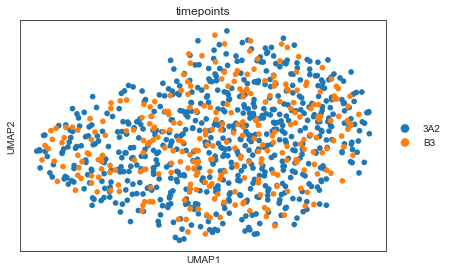

added attributes X_pca_sc and X_umap_sc


In [9]:
mb.pp.scanorama_recipe(adata, correct = True)

<div class="alert alert-block alert-success">
<b>Conclusion:</b> it looks like those cells were probably filtered out, and with scanorama the data completely overlaps. We'll use the un-batch-corrected data so we don't accidentally get rid of any biological differences between the samples.
</div>

## Cell Cycle Regression

... storing 'phase' as categorical


calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


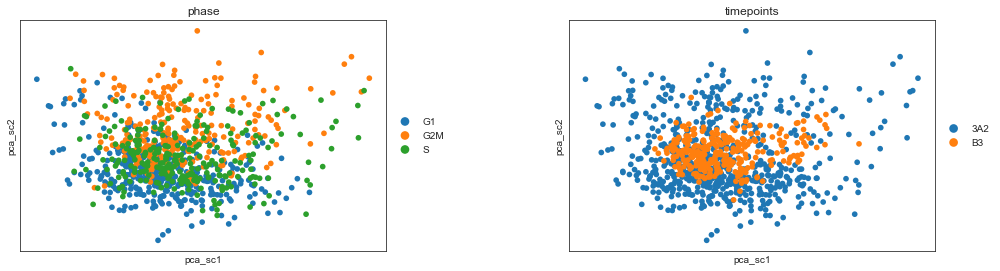

In [11]:
scv.tl.score_genes_cell_cycle(adata)
sc.pl.scatter(adata, color=['phase','timepoints'], basis = 'pca_sc')

<div class="alert alert-block alert-success">
<b>Conclusion:</b> We won't regress out cell cycle because there only seems to be a small dependence on it in PCA space, and we care about which cells are cycling and which are not.
</div>

# Dimensionality Reduction and RNA Velocity

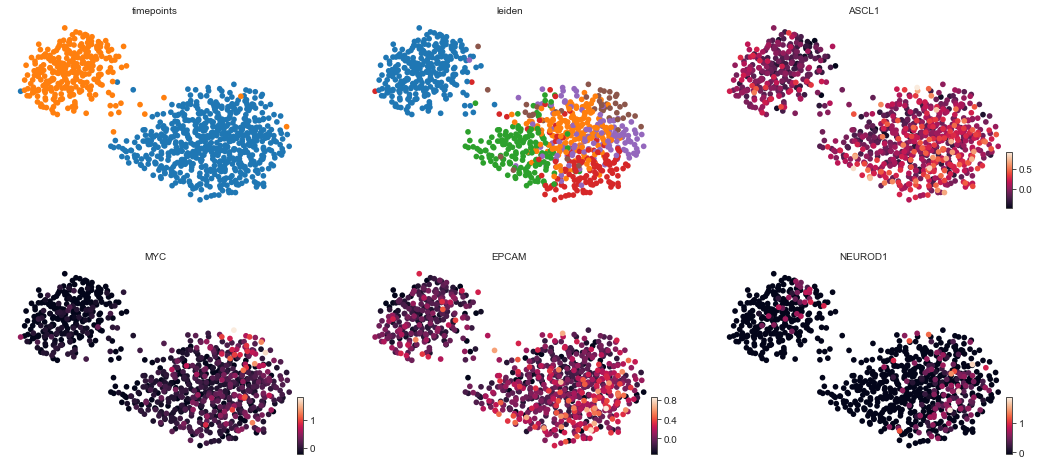

In [17]:
import matplotlib.pyplot as plt
# adata.obsm['X_umap'] = adata.obsm['X_umap_sc']
# sc.pp.neighbors(adata)
# sc.tl.leiden(adata)
# scv.tl.umap(adata)
scv.pl.umap(adata, color = ['timepoints','leiden','ASCL1','MYC','EPCAM', 'NEUROD1'], ncols = 3, smooth = True)


<div class="alert alert-block alert-success">
<b>Conclusion:</b> It looks like we did indeed filter out most of the MYC-low cells, suggesting they may have been lower quality (e.g. cells that arrested/were apoptosing at the time of the experiment).
</div>

In [18]:
adata.write_h5ad('../int/pdx/adata01.h5ad')

In [4]:
adata = sc.read_h5ad('../int/pdx/adata01.h5ad')

## Calculating Velocity

In [24]:
scv.pp.moments(adata)
scv.tl.velocity(adata, mode = 'deterministic',groupby='timepoints')
scv.tl.velocity_graph(adata)


computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


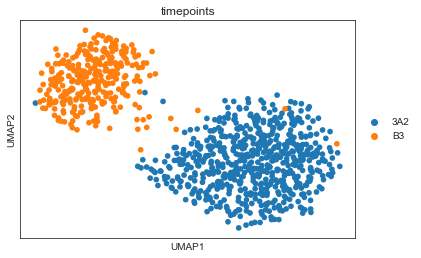

In [25]:
# sc.tl.tsne(adata, random_state=1)
sc.pl.umap(adata, color = 'timepoints')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


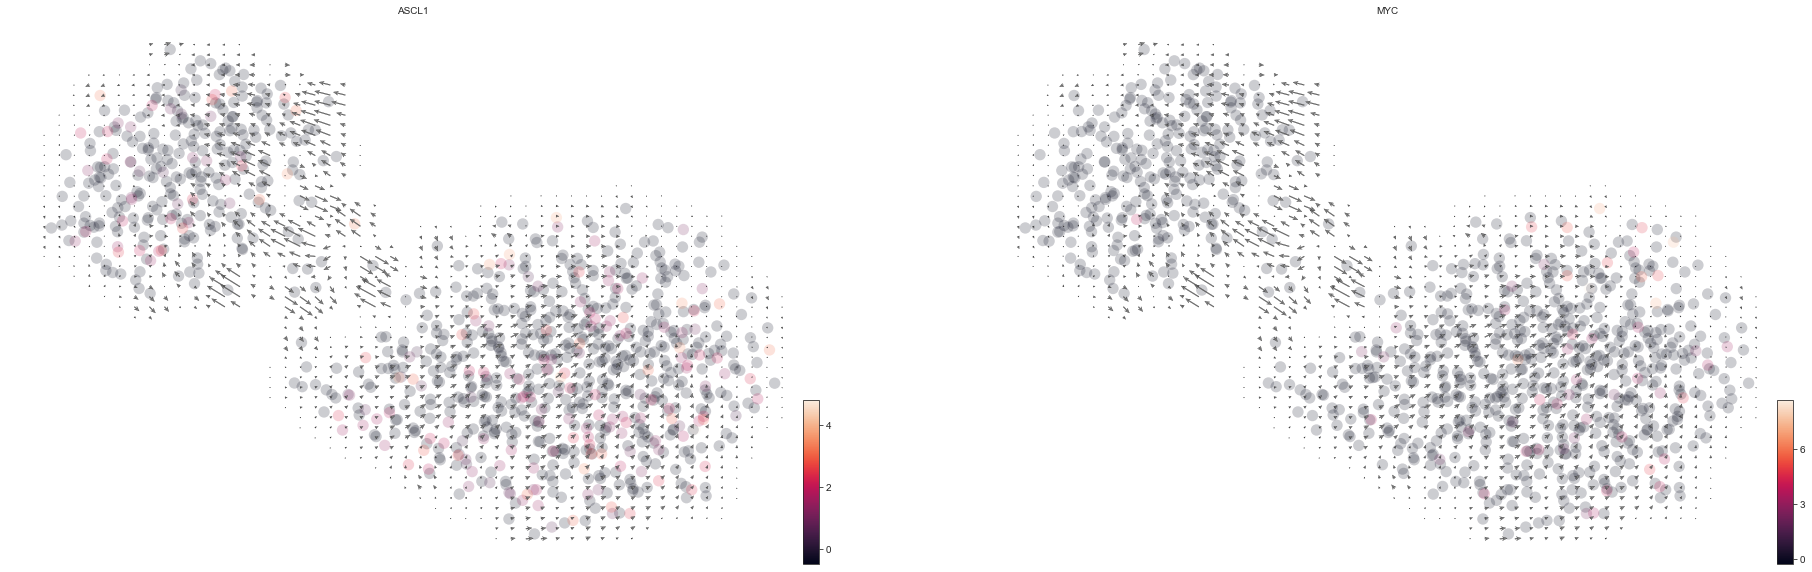

In [26]:
scv.pl.velocity_embedding_grid(adata, basis = 'umap', color = ['ASCL1','MYC'], figsize = (16,10),
                                smooth =True)

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


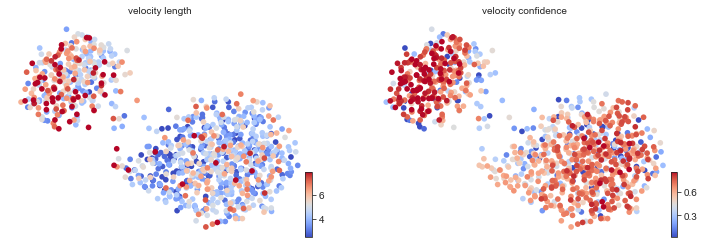

In [27]:
scv.tl.velocity_confidence(adata)

keys = 'velocity_length', 'velocity_confidence'  
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95], basis = 'umap')

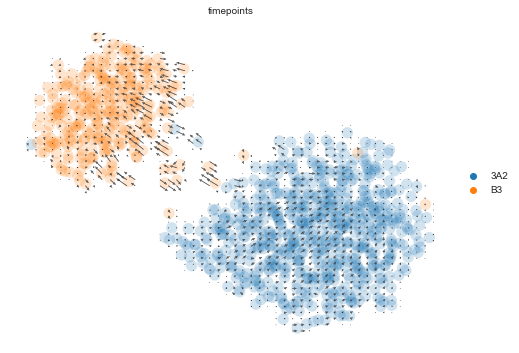

In [28]:
scv.pl.velocity_embedding_grid(adata, basis = 'umap', figsize = (8,6), legend_loc = 'on right',color = 'timepoints')


Let's save the data at this point.

In [31]:
adata.write_h5ad('../int/adata02.h5ad')

In [2]:
adata = sc.read_h5ad('../int/adata02.h5ad')

# Pseudotime and plasticity

We would like to see if we can get the same results as Ireland et al. did for their pseudotime analysis. To run Monocle2, we need the R interface `rpy2`. We'll also use the pseudotime inference within scvelo for comparison.

In [29]:
scv.tl.terminal_states(adata, groupby='timepoints')

computing terminal states
    identified 1 region of root cells and 1 region of end points  (3A2).
    identified 0 region of root cells and 1 region of end points  (B3).
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


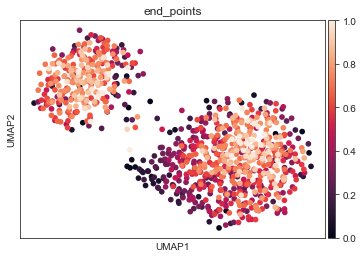

In [30]:
sc.pl.umap(adata, color="end_points")

### Velocity pseudotime

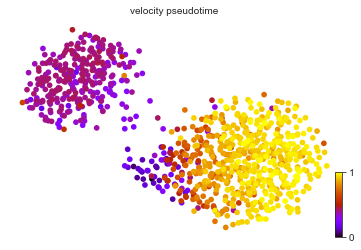

In [31]:
# Velocity pseudotime from scvelo
# scv.tl.terminal_states(adata)
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot', basis = 'umap')

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


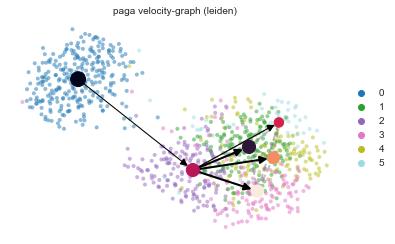

In [8]:
mb.ps.velocity_paga(adata, basis='umap', color='ASCL1')

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


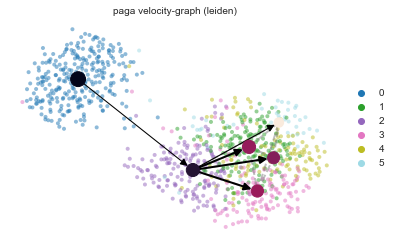

In [7]:
mb.ps.velocity_paga(adata, basis='umap', color='MYC')

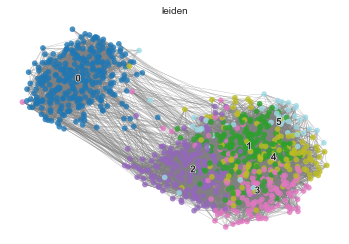

In [24]:
scv.pl.velocity_graph(adata, color = 'leiden')

In [14]:
sc.tl.rank_genes_groups(adata, groupby='leiden', groups=['2'])

categories: 0, 1, 2, etc.
var_group_labels: 2


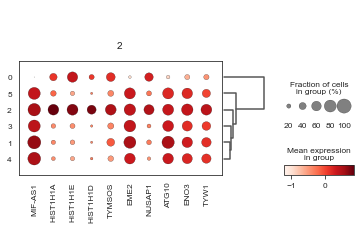

In [15]:

sc.pl.rank_genes_groups_dotplot(adata)

recovering dynamics
    finished (0:00:46) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


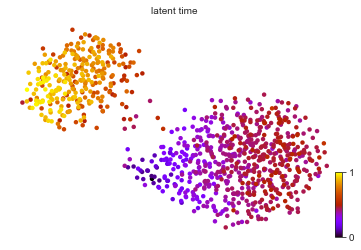

In [17]:
scv.tl.recover_dynamics(adata)
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

In [22]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:100]
top_genes

Index(['AC011446.2', 'ZNF771', 'AC104066.4', 'MARS', 'PNPLA2', 'AC011603.2',
       'CCM2L', 'AP006621.1', 'CDH2', 'HDDC2', 'PPFIA2', 'CPB2-AS1', 'CASC11',
       'WASHC5', 'C1orf54', 'SNHG22', 'AL353759.1', 'ABHD2', 'MAML2', 'PIK3R5',
       'LMO3', 'AL138963.4', 'TMEM269', 'AC005281.1', 'AL357079.2', 'JAKMIP2',
       'C5orf56', 'HIF1AN', 'DPYSL3', 'AC006262.3', 'JAKMIP2-AS1', 'SYNE2',
       'AP003306.2', 'PBX1', 'SV2A', 'SQLE', 'NLGN1', 'LIFR', 'AL590440.1',
       'MALAT1', 'SETBP1', 'AC019163.1', 'SGO1-AS1', 'ATP8A2', 'TMPO-AS1',
       'TMPO', 'SPOCK1', 'NRCAM', 'MYRIP', 'PDZRN4', 'STK32A', 'KCNH8',
       'FBXO32', 'DDC-AS1', 'SLC39A1', 'SLC7A14', 'FAT3', 'GPC6', 'TEP1',
       'TEAD4', 'STIL', 'GPS2', 'KHDRBS1', 'SH3GL2', 'AC002550.1', 'ZEB1',
       'CEP57', 'CNTN4', 'AC072022.2', 'MBNL3', 'AL662884.3', 'ADAMTSL4',
       'AC106793.1', 'HIST1H2AC', 'KIF4A', 'GRM8', 'SPSB2', 'AC020558.6',
       'C12orf49', 'CUL4A', 'NAV1', 'NSD2', 'AC027309.1', 'CCDC159', 'ZNF521',
       'AC

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Interestingly, we now see the second timepoint stemming from a cluster related to B3, even though there is very little overlap between the two samples. It seems cells from B3 are moving toward this cluster, which is then the source for all of the other cells. Also, cells are moving towards higher-MYC (light pink cluster and darker pink clusters-- black = 0 expression).
</div>

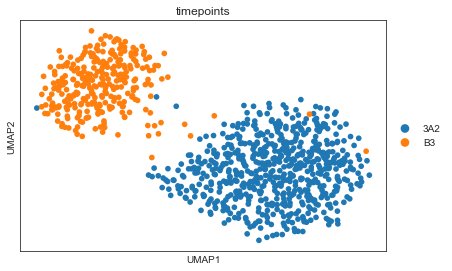

In [33]:
sc.pl.scatter(adata, color = 'timepoints', basis = 'umap')

In [38]:
adata.write_h5ad('../int/adata03.h5ad')

In [3]:
adata = sc.read_h5ad('../int/adata03.h5ad')

### Calculate plasticity using CTrP

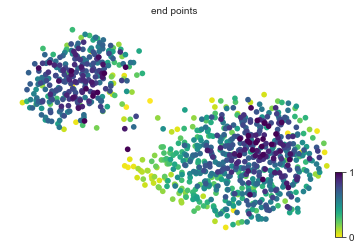

In [34]:
scv.pl.umap(adata, color = 'end_points')

In [40]:
mb.ps.ctrp(adata, self_transitions=False, groupby='timepoints', adata_dist='X_pca')

computing terminal states


Trying to set attribute `.obs` of view, copying.


Eigenvalues:  [0.9999994]
(635, 1)
    identified 1 end points (3A2)
Dropping absorbing rows for fundamental matrix...
(619, 619)
Calculating fate...
Calculating distances...
Calculating inner product...


Trying to set attribute `.obs` of view, copying.


Eigenvalues:  [0.9999999]
(293, 1)
    identified 1 end points (B3)
Dropping absorbing rows for fundamental matrix...
(286, 286)
Calculating fate...
Calculating distances...
Calculating inner product...


In [41]:
adata

AnnData object with n_obs × n_vars = 928 × 11490
    obs: 'Clusters', '_X', '_Y', 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'timepoints', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'ctrp', 'absorbing'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-3A2', 'dropkick_coef-B3', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'mean', 'std', 'velo

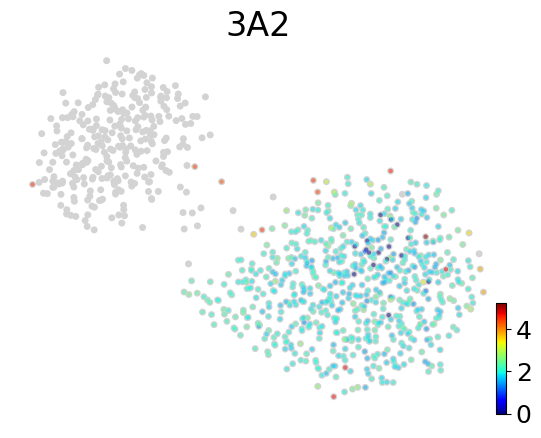

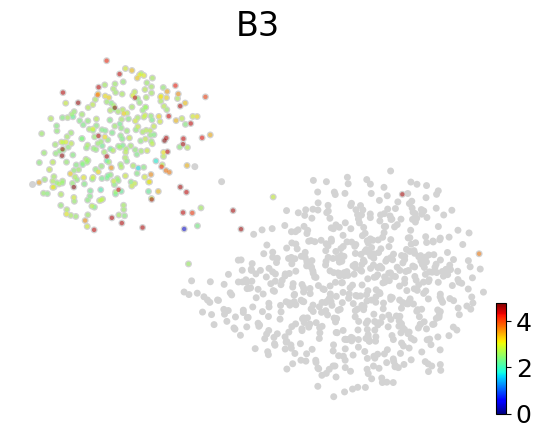

In [42]:
mb.pl.ctrp_groups(adata, groups = 'timepoints', basis = 'umap')


3A2 1.9824869200856985
B3 2.9211661829008397


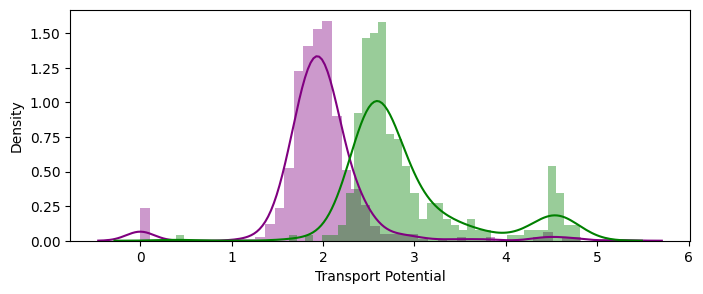

In [43]:
custom_palette = ['purple','green','#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']

mb.pl.ctrp_hist(adata, groups='timepoints', bins = 50,figsize = (8,3), custom_palette=custom_palette,fname='pdx_hist_pheno')



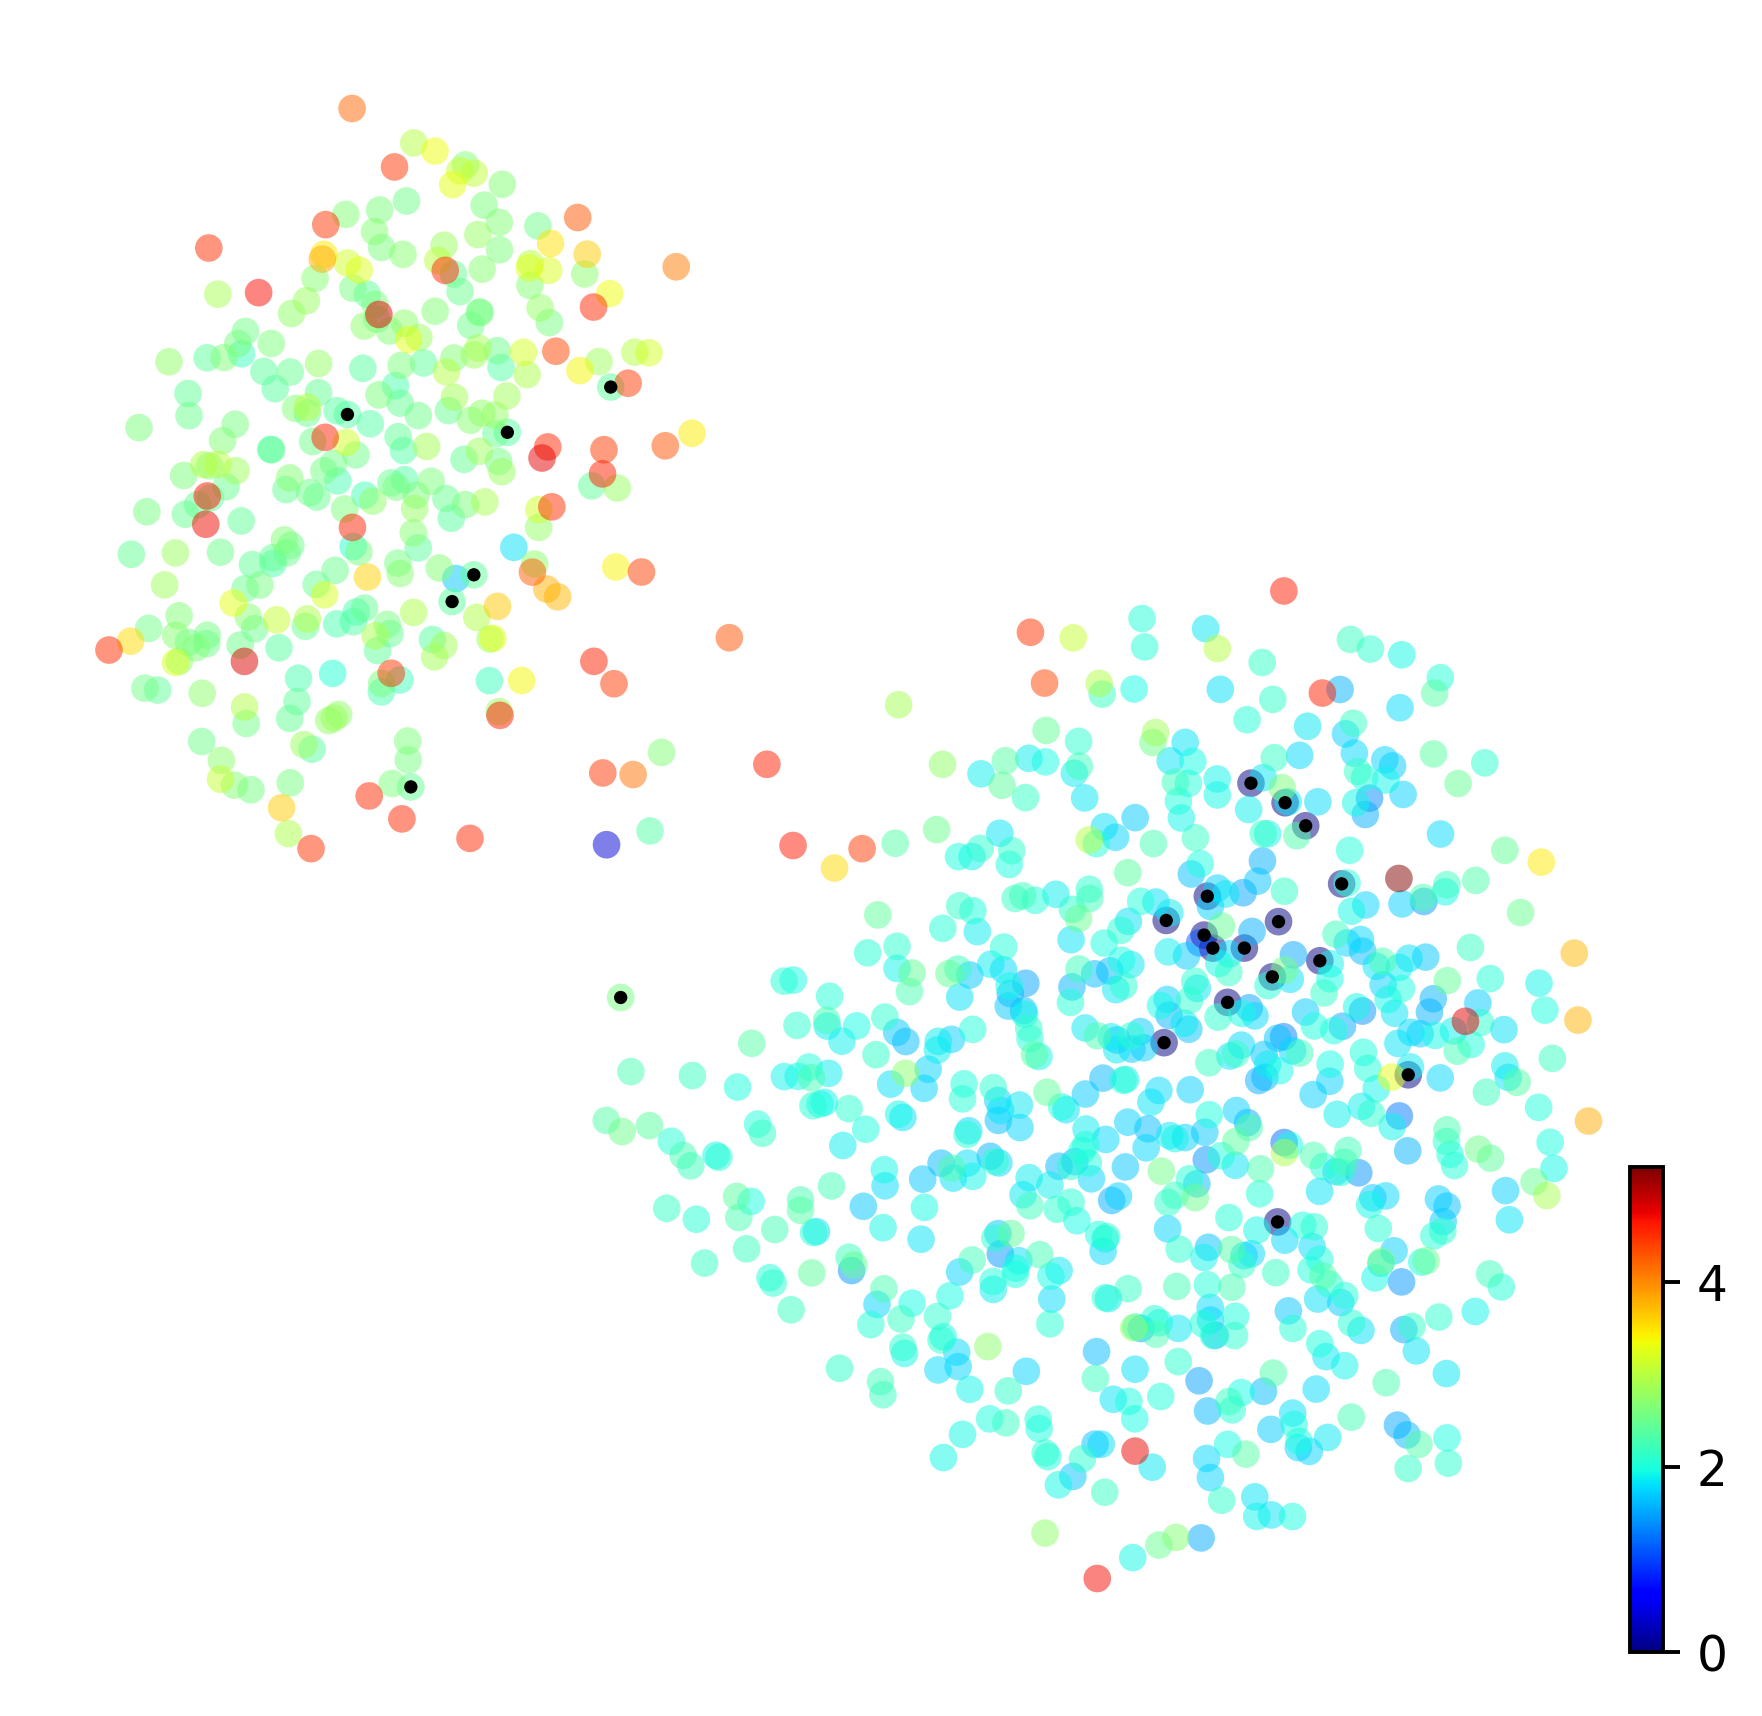

In [44]:
mb.pl.ctrp(adata, basis = 'umap')

In [45]:
adata.write_h5ad('../int/pdx/adata04_dropkick.h5ad')

In [6]:
adata = sc.read_h5ad('../int/pdx/adata04_dropkick.h5ad')

<div class="alert alert-block alert-success">
<b>Conclusion:</b> This is something rare that I haven't really seen before: the timepoint after treatment decreased in plasticity. This is probably due to the fact that there wasn't a sink found in the first timepoint.
</div>

# Signature Subtyping

Notice that only 40 genes overlap between this data and the signature matrix.

In [54]:
adata, adata_small, sig_matrix2 =mb.ar.phenotyping_recipe(adata, sig_matrix,groupby = 'timepoints')

Trying to set attribute `.obs` of view, copying.


Transforming tumor data...
Gene signature matrix now has shape:  (40, 5)
Tumor data shortened to genes in gene list...
(587, 40)
Tumor data subsetting complete.


Index(['SCLC-A2_Score', 'SCLC-A_Score', 'SCLC-N_Score'], dtype='object')


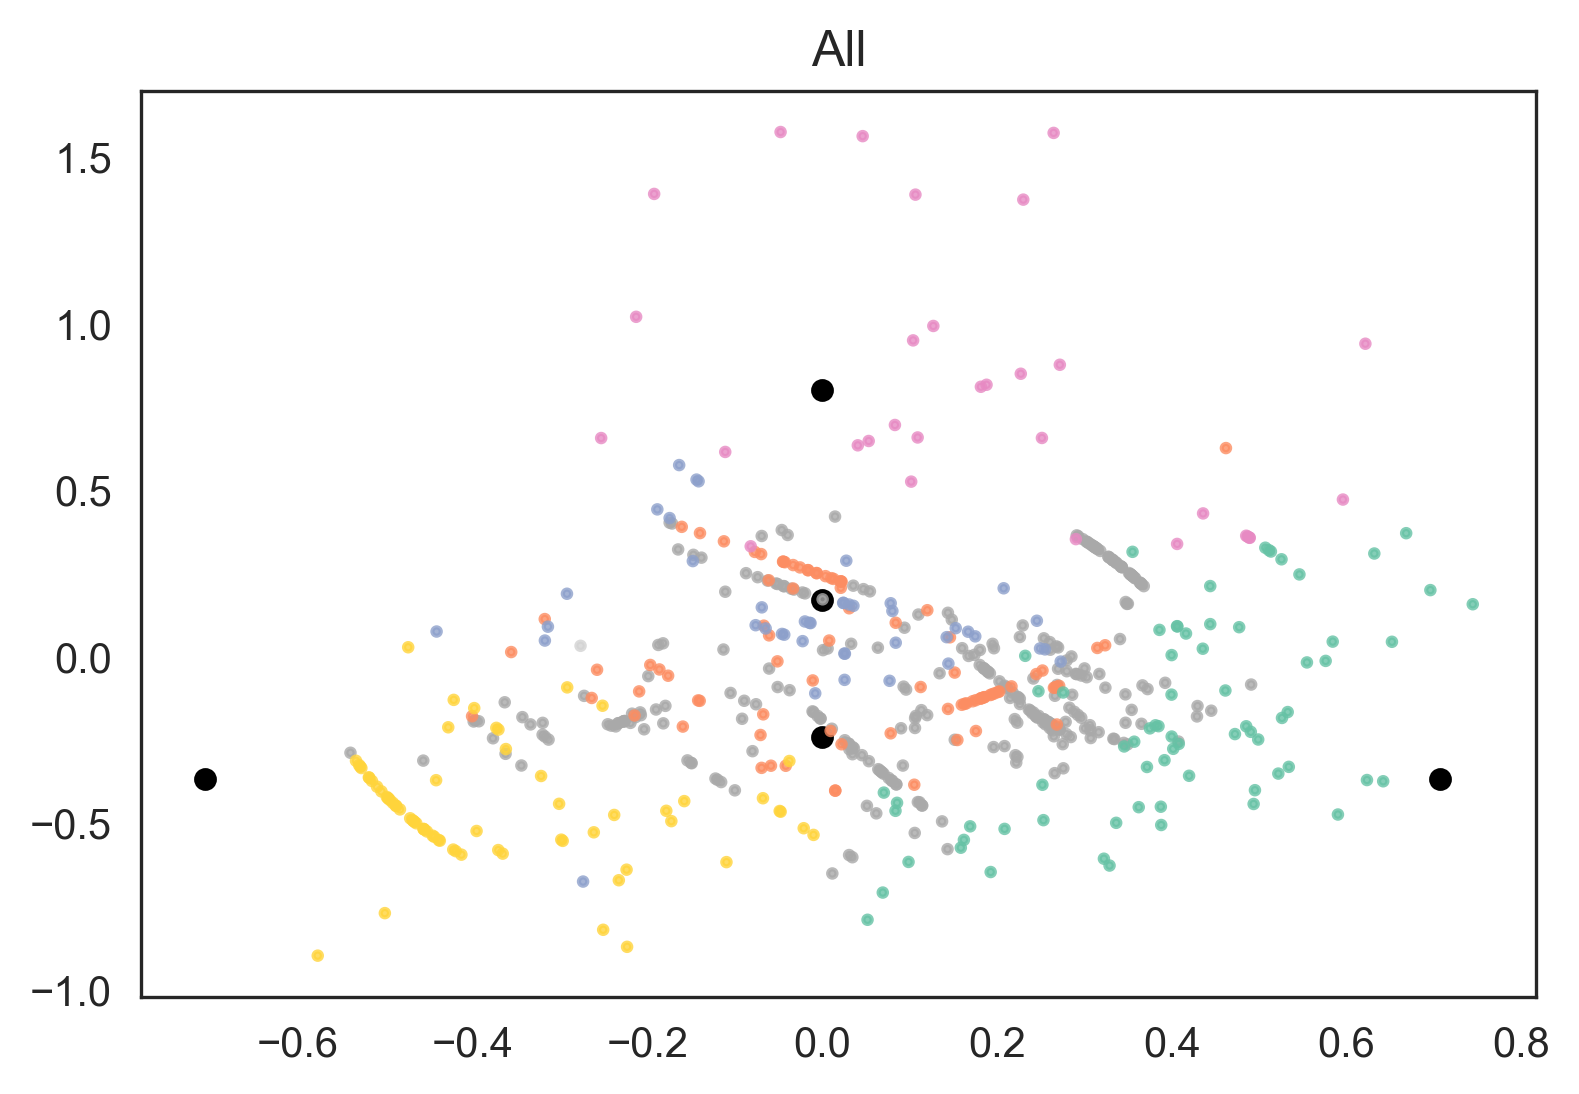

In [37]:

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
cp = ['#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']
color_dict = {'SCLC-Y': cp[4], 'SCLC-A': cp[0], 'SCLC-A2': cp[1], 'SCLC-N': cp[2], 'SCLC-P': cp[3],
              'Generalist': 'darkgray', 'None': 'lightgrey'}
mb.pl.archetype_diagrams(adata_small, sig_matrix, color_dict=color_dict, groupby='None',color='Phenotype',
                        order = ['SCLC-Y','SCLC-A','SCLC-P','SCLC-N','SCLC-A2'], norm = 'None',num_steps = 40,
                        multiplier=1, figsize=(6,4), score_name = '_Score', alpha = .8, s = 4, sizes = 20, vmax = None)



<div class="alert alert-block alert-success">
<b>Conclusion:</b> Unfortunately, it is hard to make sense of this picture since only 40/105 genes are found in the data. In general, it seems the samples have a broad mix of cell types, although it's really hard to tell if this is accurate.
</div>

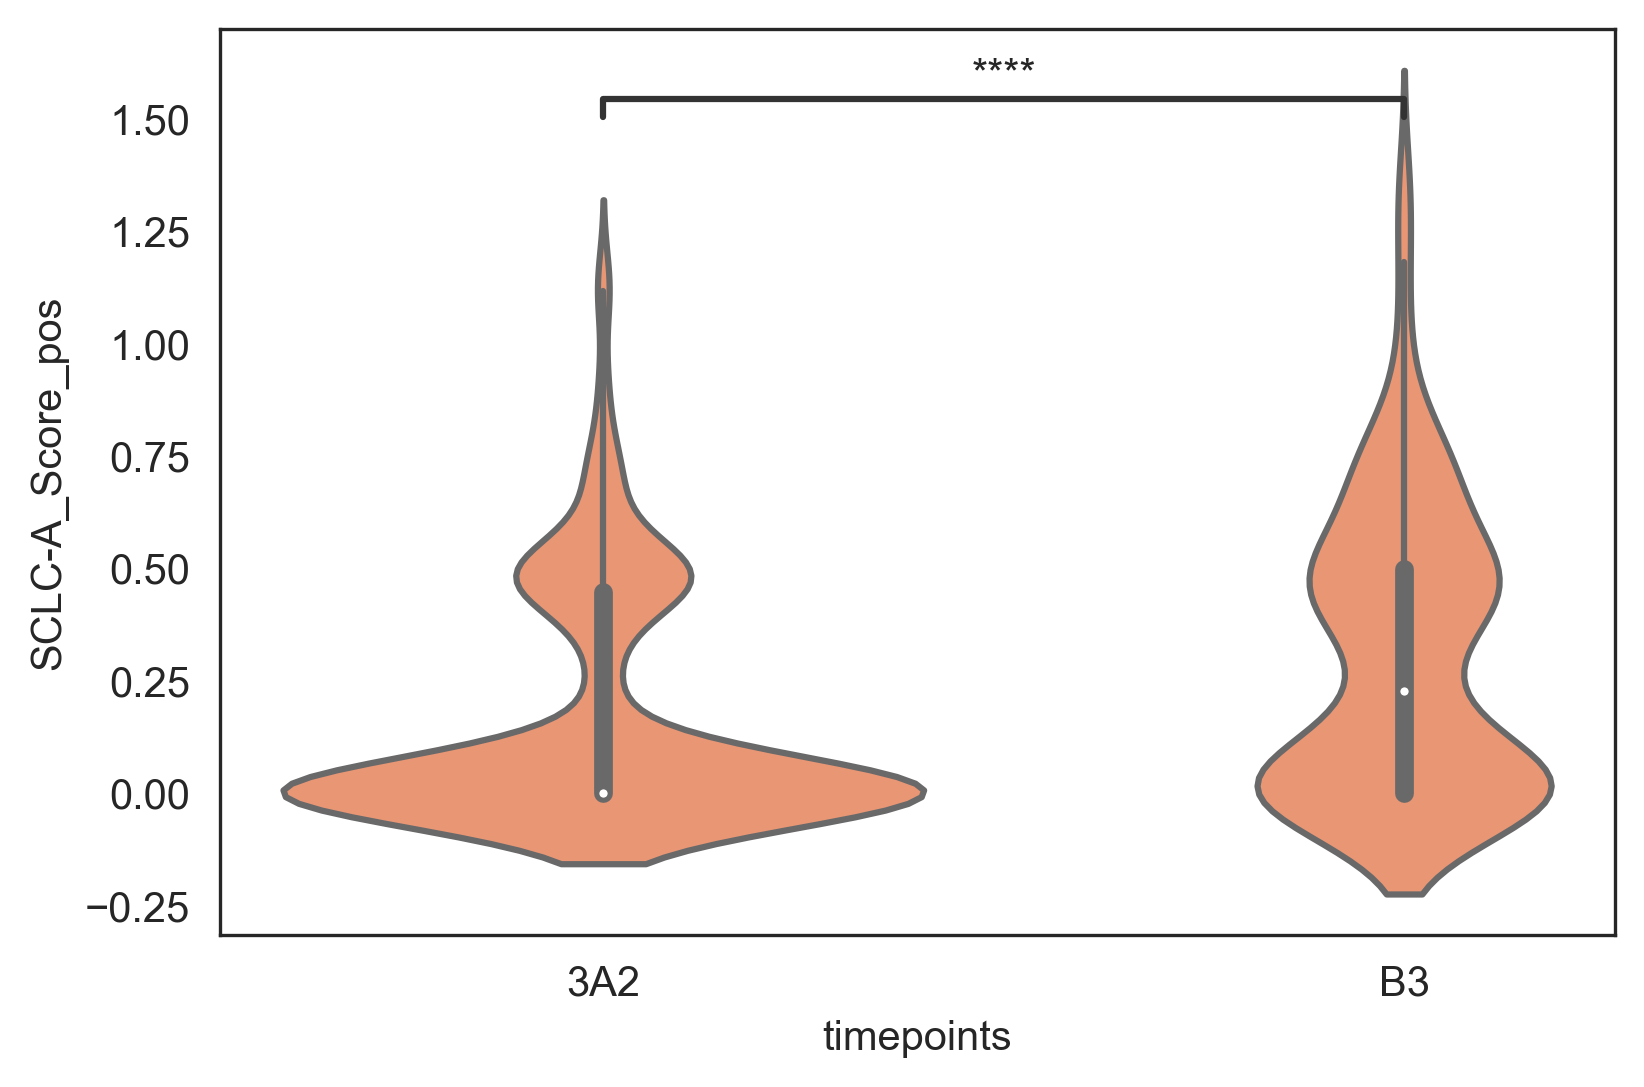

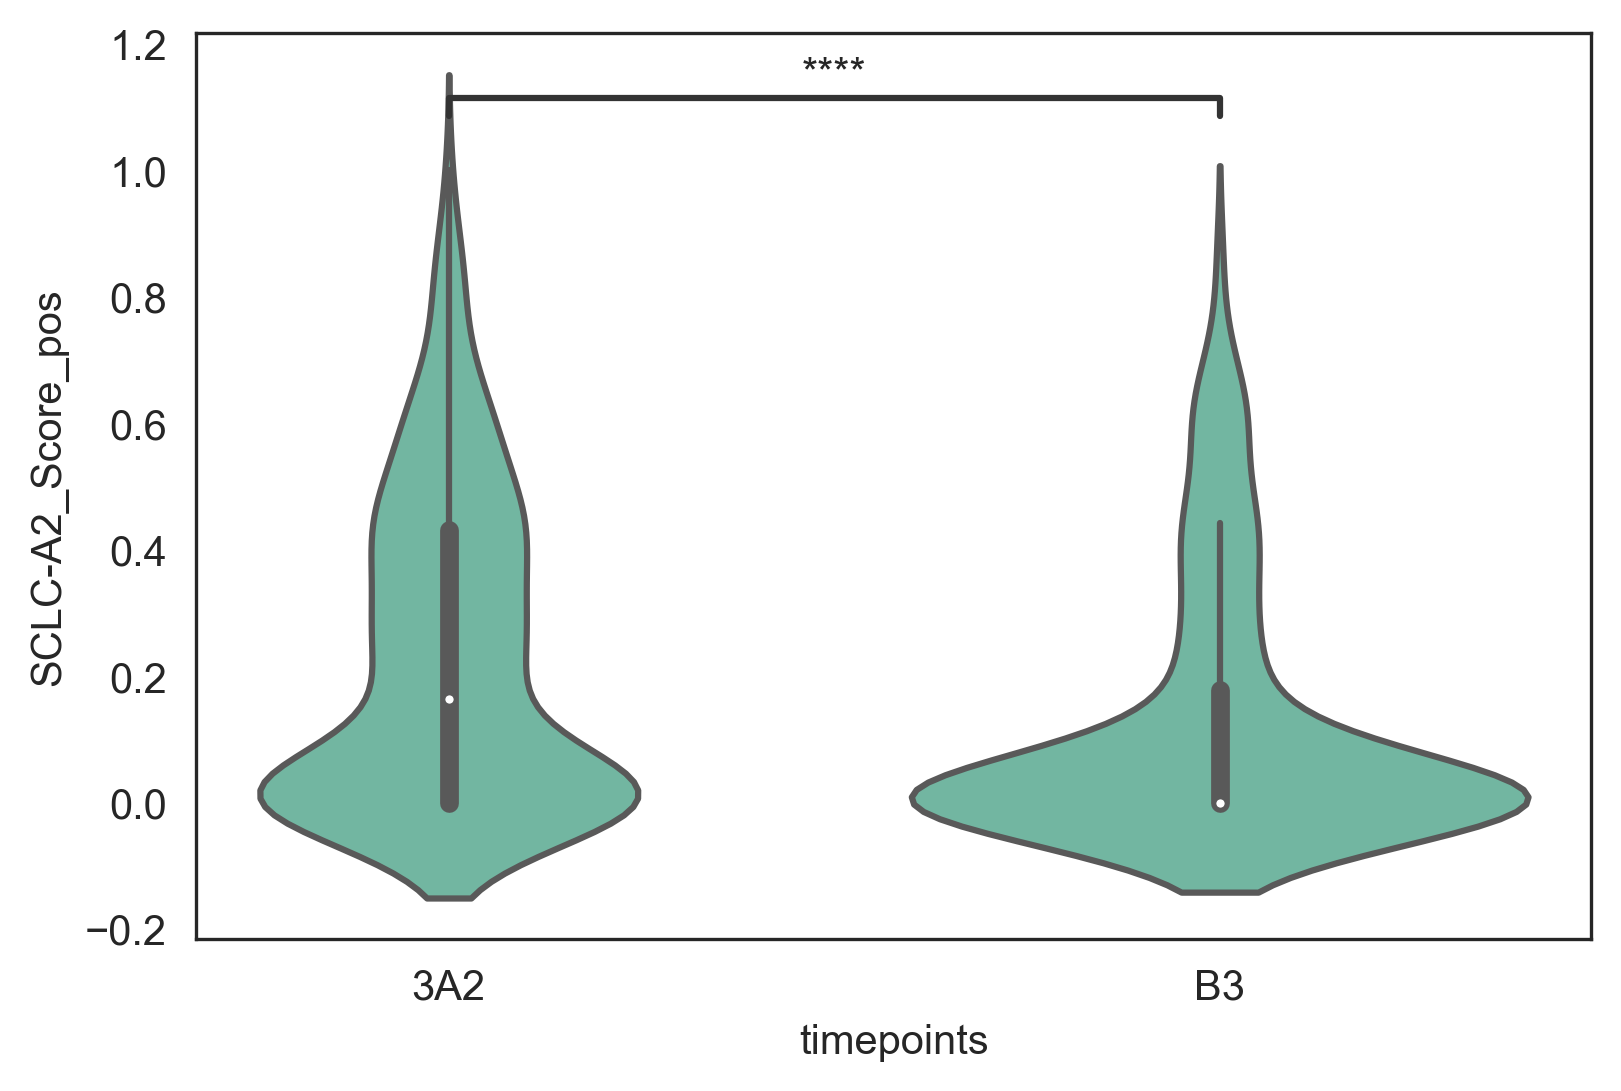

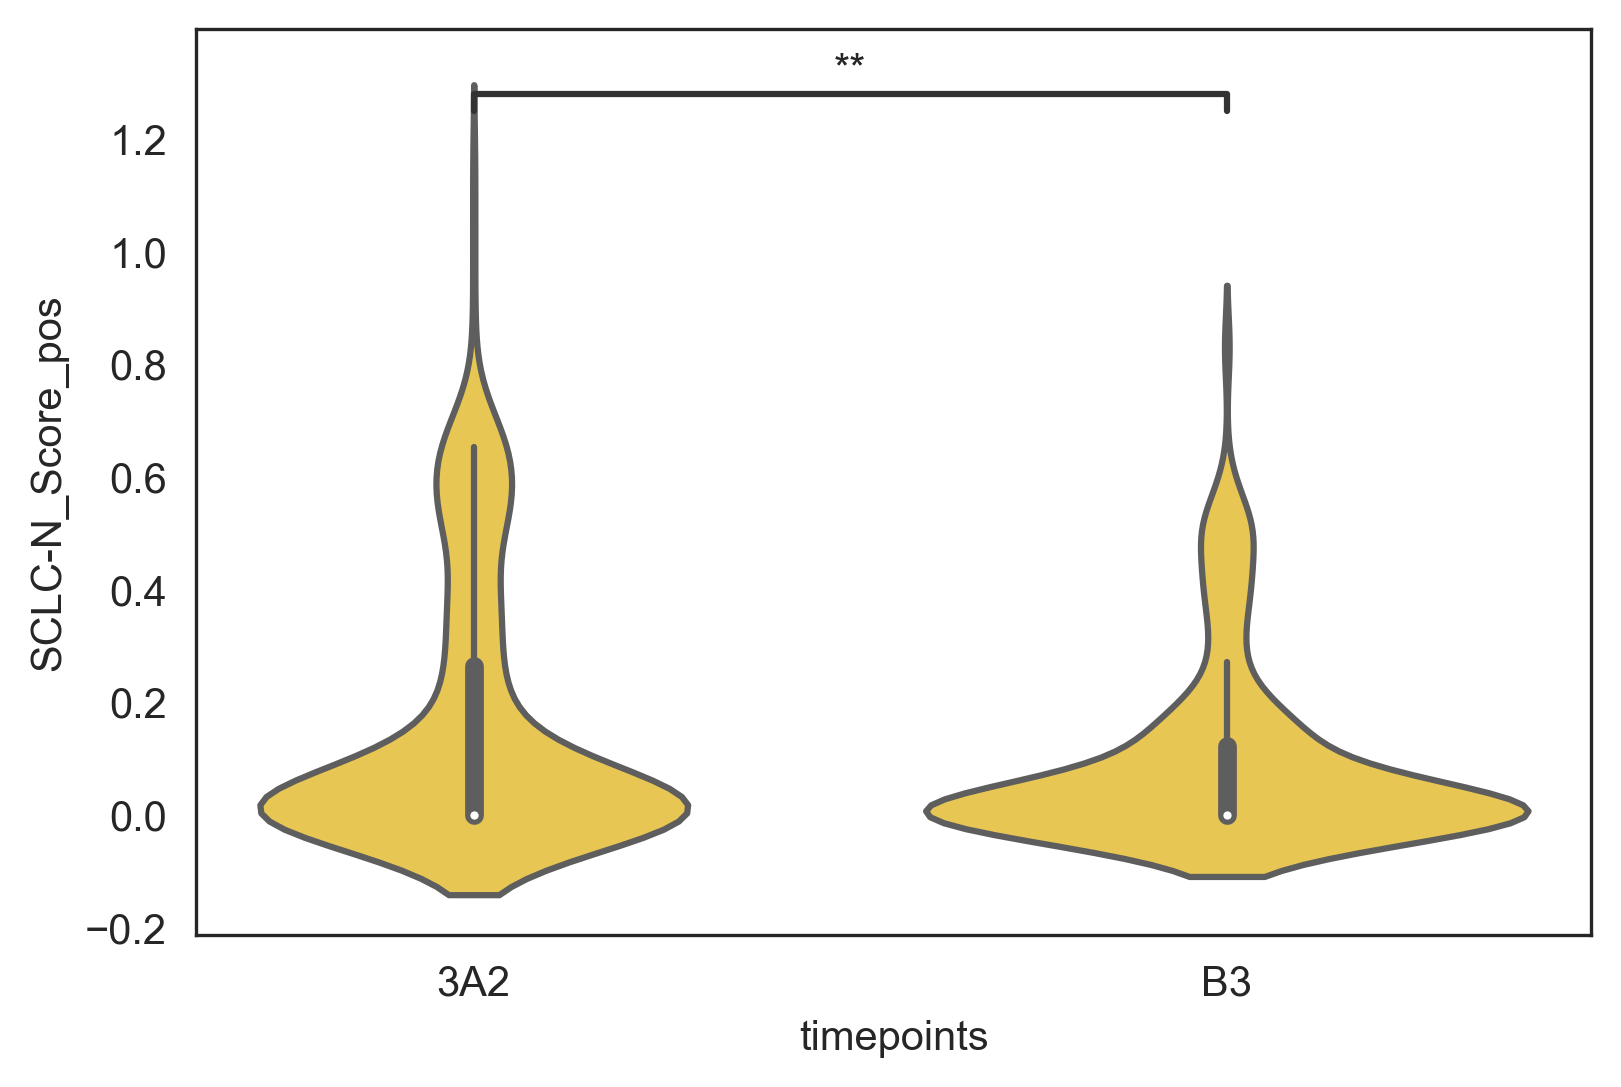

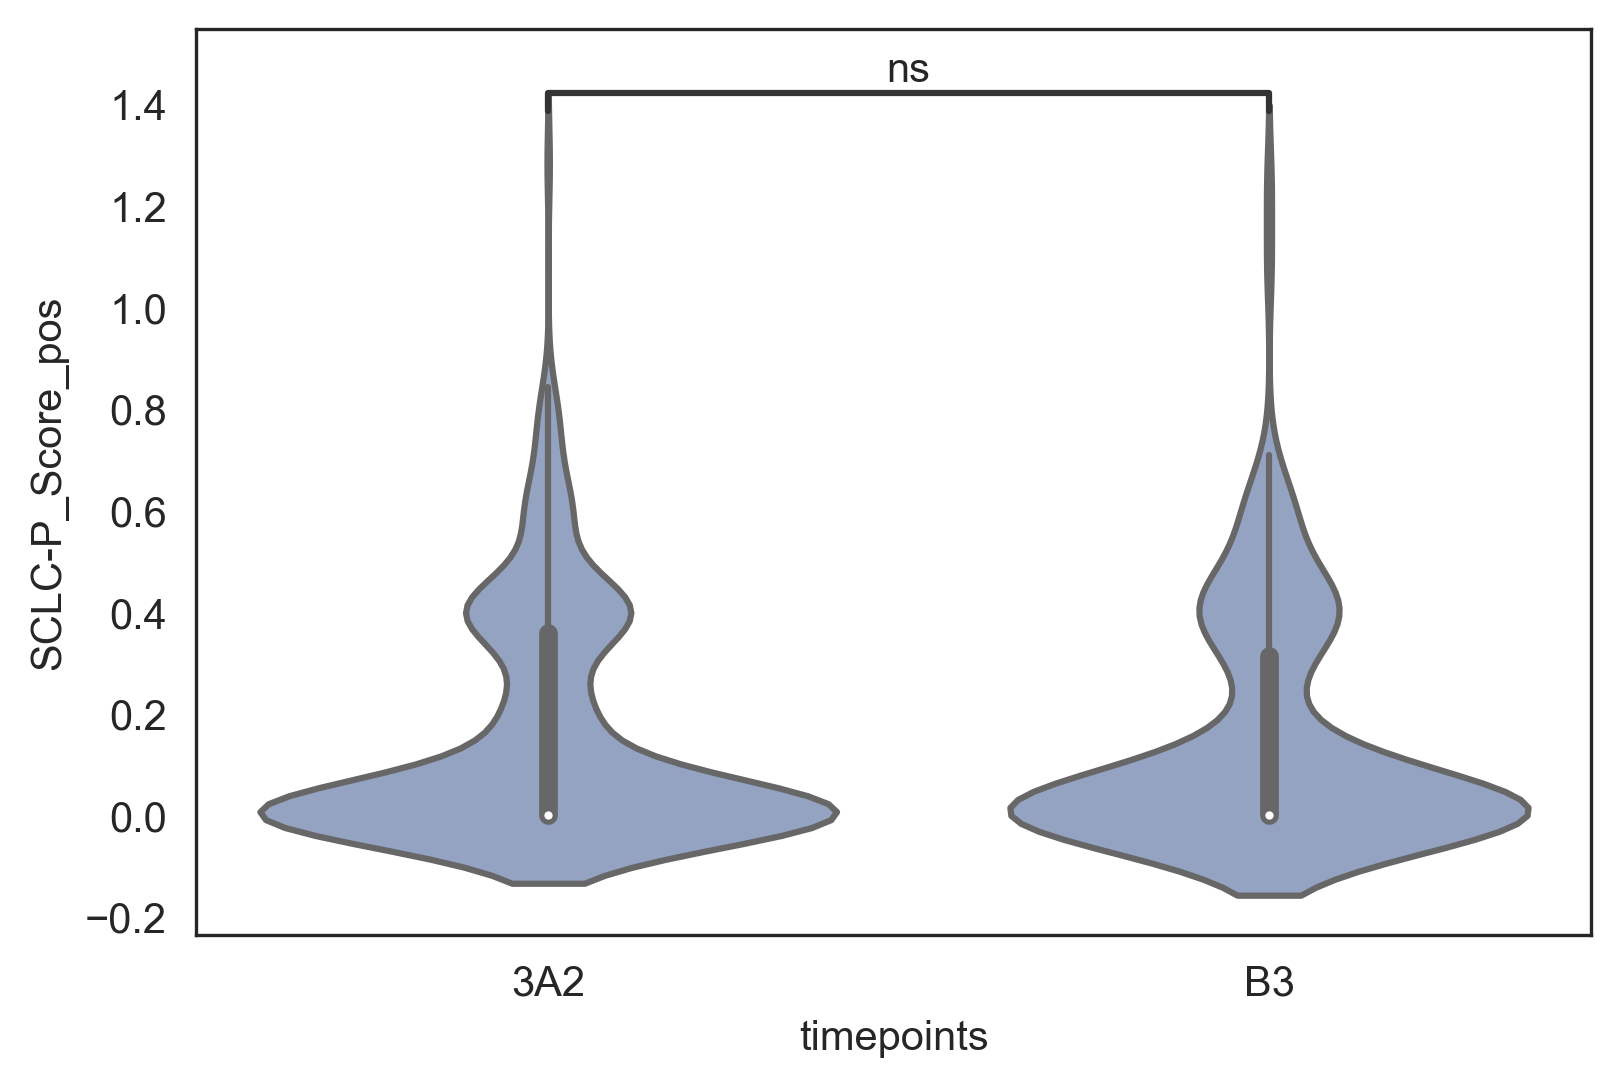

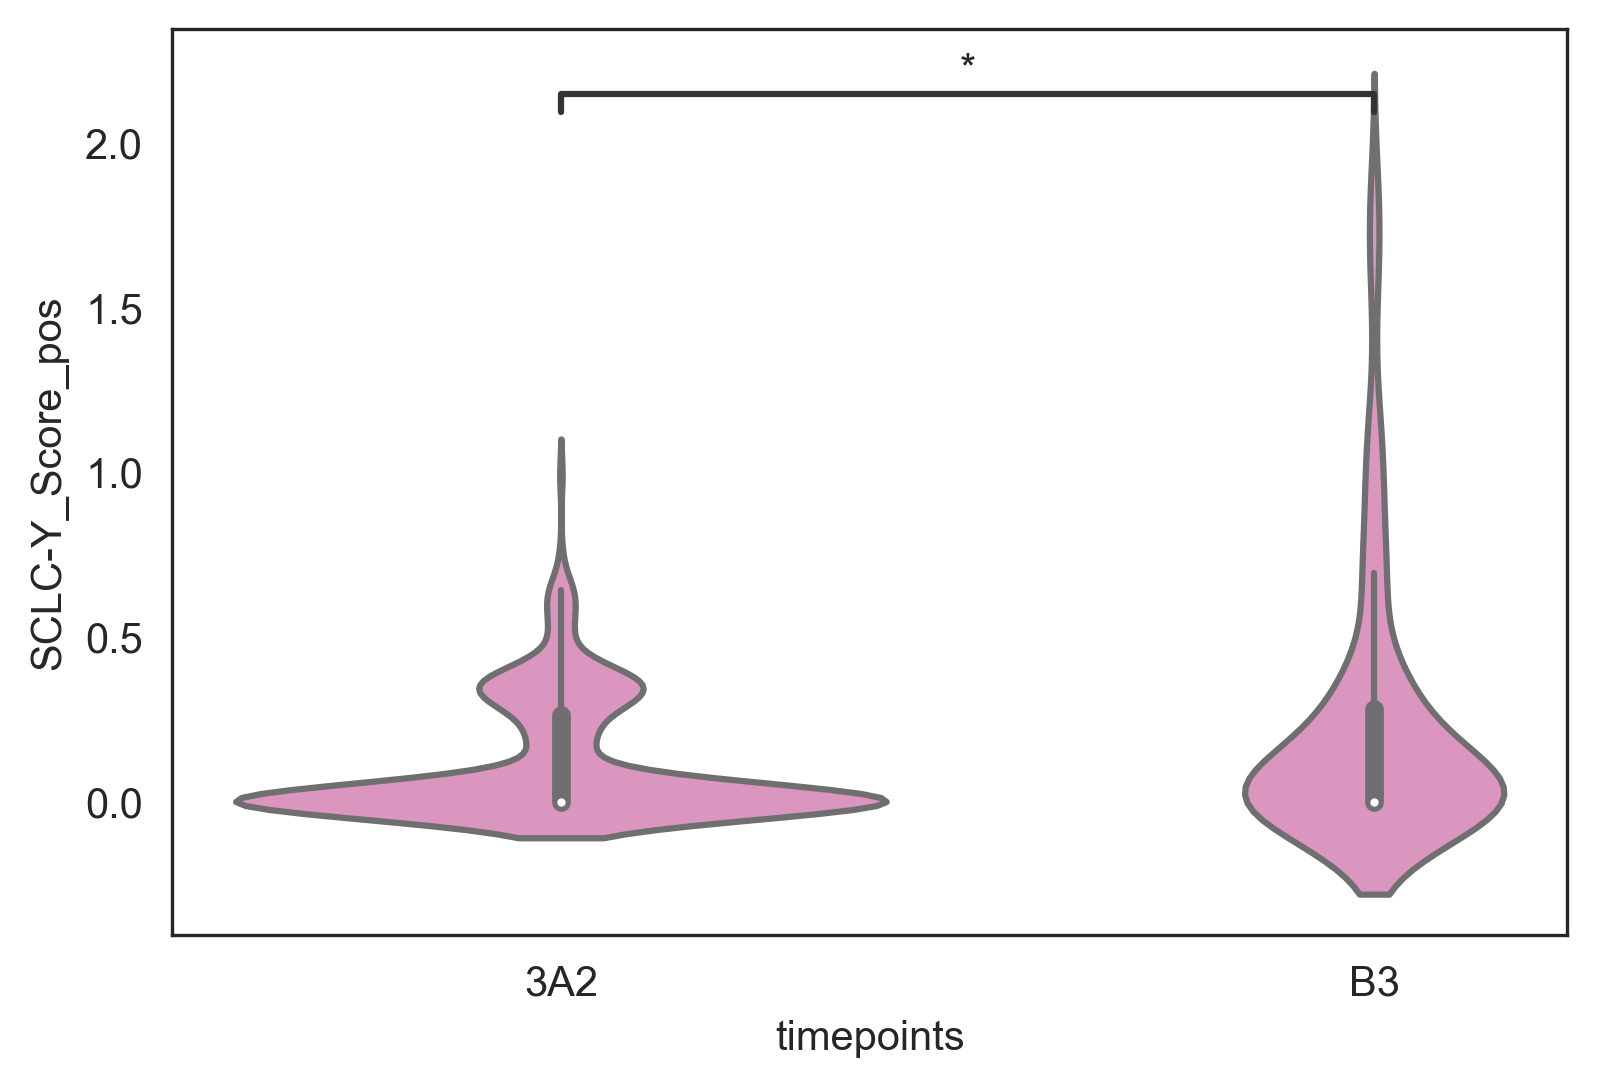

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
subtypes = ['SCLC-A_Score','SCLC-A2_Score','SCLC-N_Score','SCLC-P_Score','SCLC-Y_Score']

for x,i in enumerate(subtypes):
    adata_small.obs[f"{i}_pos"] = adata_small.obs[f"{i}"]*(adata_small.obs[f"{i}"]>0)
    plt.figure()
    ax = sns.violinplot(data = adata_small.obs, x = 'timepoints',y=f"{i}_pos", color = cp[x])
    add_stat_annotation(ax, data=adata_small.obs, x='timepoints',y = f'{i}_pos',
                    box_pairs=[('3A2','B3')],
                         test='Mann-Whitney', text_format='star', loc='inside', verbose=0)
    #     plt.savefig(f"./figures/{i}_htumor.pdf")


<div class="alert alert-block alert-success">
<b>Conclusion:</b> If we do trust the subtyping analysis enough, we find that Y and A cells decrease after treatment, and A2 and N cells increase. This makes sense with the increase in Myc, although I would have thought that Y cells increased too. I have found that NE cell types tend to be lower quality and get filtered out, so I would trust these Y results and do not suspect that Y cells are being filtered too heavily..
</div>

(<AxesSubplot:xlabel='Phenotype', ylabel='ctrp'>,
  <statannot.StatResult.StatResult at 0x7fa1f13e3810>])

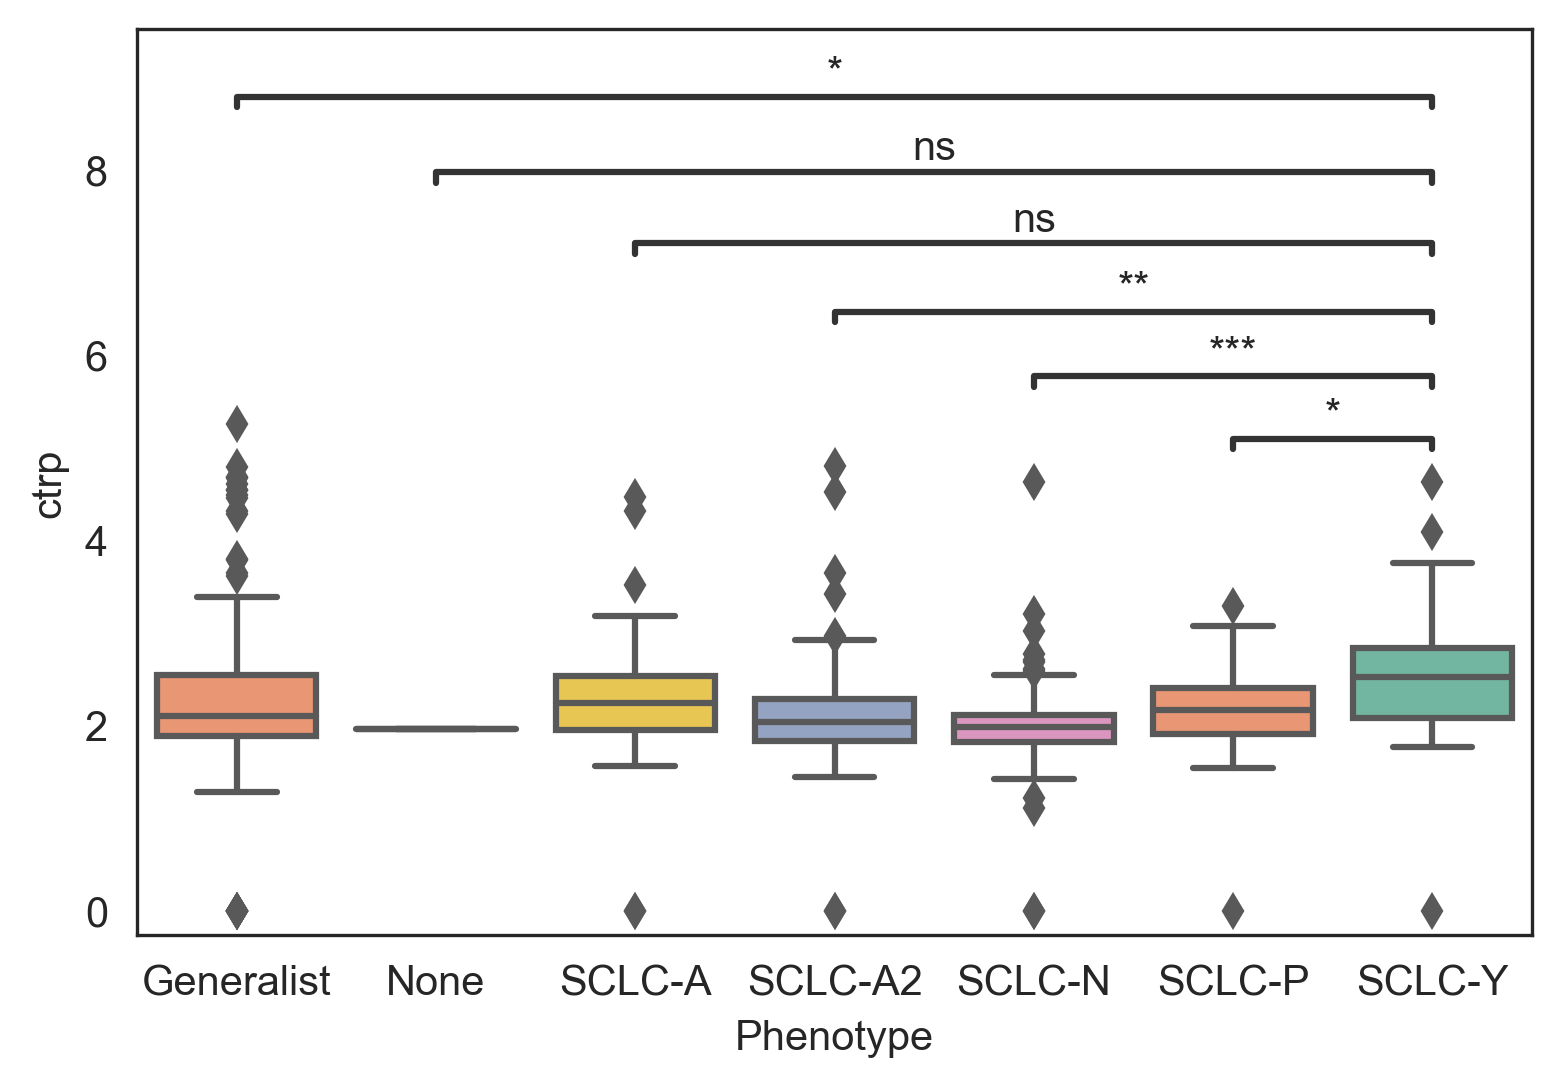

In [15]:
from statannot import add_stat_annotation

plt.figure(figsize=(6,4))
ax = sns.boxplot(data = adata_small.obs, x='Phenotype',y = 'ctrp',palette = cp,
                order = sorted(list(set(adata_smal.obs['Phenotype']))))
add_stat_annotation(ax, data=adata_small.obs, x='Phenotype',y = 'ctrp',
                    order = sorted(list(set(adata_small.obs['Phenotype']))),
                    box_pairs=[('SCLC-Y','None'),
                              ('SCLC-Y','SCLC-A'), ("SCLC-Y", "SCLC-A2"),
                               ("SCLC-Y", "SCLC-N"),("SCLC-Y", "SCLC-P"),
                              ("Generalist", "SCLC-Y")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=0)


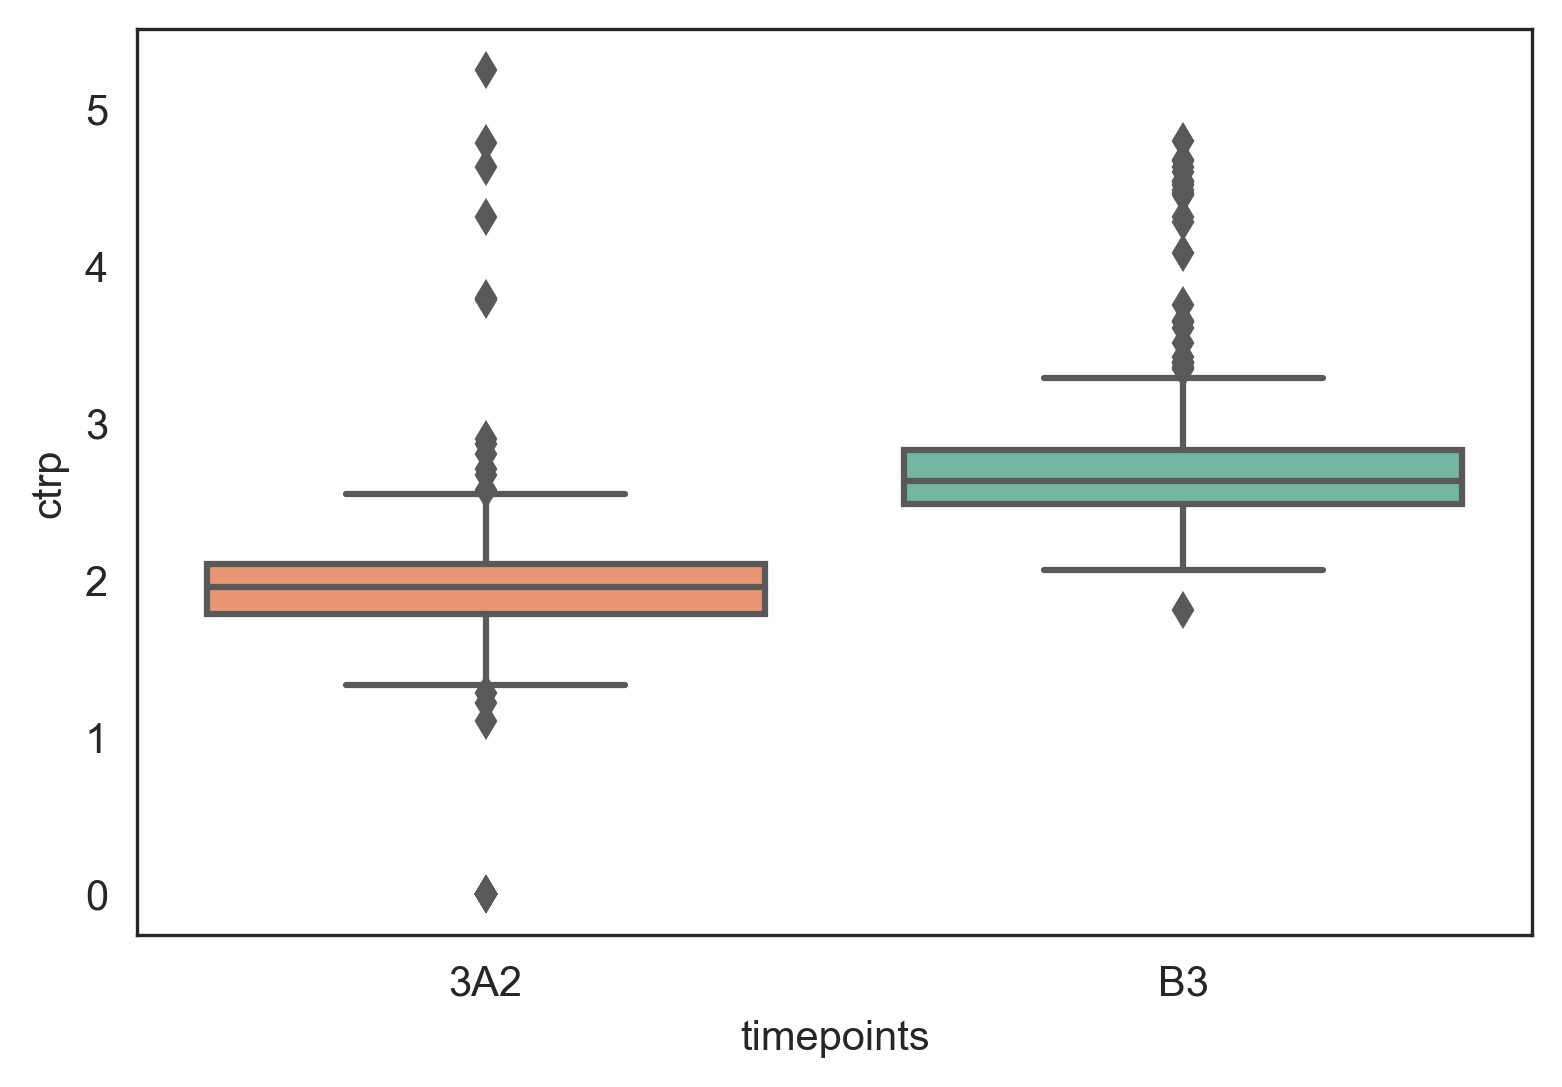

In [43]:
from statannot import add_stat_annotation

plt.figure(figsize=(6,4))
ax = sns.boxplot(data = adata_small.obs, x='timepoints',y = 'ctrp',palette = cp)
                 # add_stat_annotation(ax, data=adata_small.obs, x='timepoints',y = 'ctrp',
#                     order = sorted(list(set(adata_small.obs['timepoints']))),
#                     box_pairs=[('SCLC-Y','None'),
#                               ('SCLC-Y','SCLC-A'), ("SCLC-Y", "SCLC-A2"),
#                                ("SCLC-Y", "SCLC-N"),("SCLC-Y", "SCLC-P"),
#                               ("Generalist", "SCLC-Y")],
#                     test='Mann-Whitney', text_format='star', loc='inside', verbose=0)


In [52]:
adata

AnnData object with n_obs × n_vars = 928 × 11490
    obs: 'Clusters', '_X', '_Y', 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'timepoints', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'ctrp', 'absorbing', 'SCLC-A_Score', 'SCLC-A2_Score', 'SCLC-N_Score', 'SCLC-P_Score', 'SCLC-Y_Score', 'SCLC-A_Score_t1', 'SCLC-A2_Score_t1', 'SCLC-N_Score_t1', 'SCLC-P_Score_t1', 'SCLC-Y_Score_t1', 'Phenotype', 'Myc'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-3A2', 'dropkick_

In [59]:
adata.obs['Phenotype'] =adata_small.obs['Phenotype']

KeyError: nan

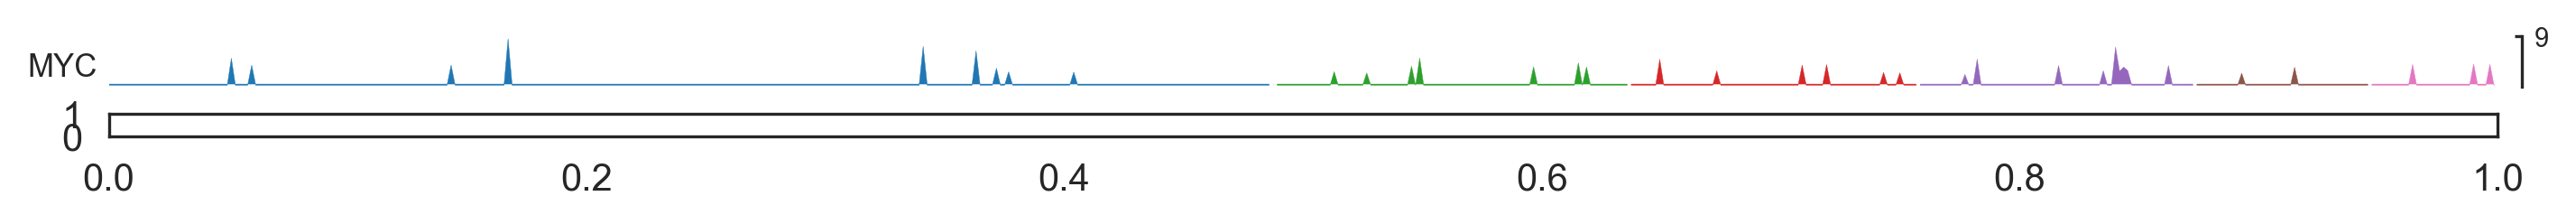

In [60]:
sc.pl.tracksplot(adata,["MYC"], groupby='Phenotype')


<div class="alert alert-block alert-success">
<b>Conclusion:</b> Regardless of the decrease in Y cells, they still seem to be the most plastic. So story so far: tumor before treatment is highly plastic with a good amount of Y cells. MYC amplification causes the subtypes to shift towards A2 and N, and that seems to actually decrease plasticity a bit. The MYC-high cells that looked like a sink before was probably due to Ben's suspicion of cell cycle arrest (Man he is smart!!).
</div>

**Open questions**
1. Why are the MYC-amplified cells resistant, and do we know they are actually all resistant or just a subset of them? Are they cross-resistant, as Ben suggested they might be?
2. There is movement from the first timepoint towards the second (even though the transitions are independently calculated for each sample). Could this key us in to how cells change from the first timepoint to the second?
3. If we make a network of MYC, could we figure out an intervention to avoid this change?

In [27]:
adata.write_h5ad('../int/pdx/adata05.h5ad')

In [56]:
adata = sc.read_h5ad('../int/pdx/adata05.h5ad')

In [64]:
adata.obs['leiden'].to_csv("leiden_post_dropkick.csv")

# Network inference: Imputation of time points

In [57]:
mb.pp.magic_recipe(adata, [i.capitalize() for i in tfs], 'Phenotype_filtered', fname='rpm')


Calculating MAGIC...
  Running MAGIC on 15257 cells and 21163 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 10.95 seconds.
    Calculating KNN search...
    Calculated KNN search in 33.19 seconds.
    Calculating affinities...
    Calculated affinities in 31.84 seconds.
  Calculated graph and diffusion operator in 76.00 seconds.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 83.04 seconds.
Calculating PCA...
Calculated PCA in 9.02 seconds.
Calculating imputation...
Calculated imputation in 0.08 seconds.
